# **Does the sun make us talk about joy ?**

**Author** : Lazar van Berchem

**Date** : January 2025, 17th

## I. Question

**Introduction:**  

We often associate climatic conditions with our mood. And that warmer countries are generally happier. Conversely, cold countries are often associated with a certain coldness of soul.
We might wonder whether temperature and solar radiation influence people's well-being, but also, more specifically, whether they talk more about their happiness, or at least that their language has more terms to describe it. 

**Problematisation:**  

Is there a positive link between temperature and solar radiation and the number of words a language has to describe happiness?

**Hypothesis:**  
1. The higher the temperature at a given location, the more synonyms for 'joy' there are in the spoken language, as developed above.
2. The higher the solar radiation in a given area, the more synonyms for 'joy' there are in the spoken language.

**Data:**  

To study this, we are going to use the data made available by Lexibank (a linguistic database managed by the Max Planck Institute, comprising more than 100 lists of standardised words from languages all over the world). This will enable us to quantify the number of joy synonyms per language in the data.

In addition, to retrieve their location, we will add data from Glottolog (a catalogue of the world's languages with their bibliographic references and coordinates details).

Finally, we will use data from WorldClim (a global database providing free climate data between 1970 and 2000) to find out the average temperatures and average solar radiation for each region, assuming that they have not really changed over time.

**Analysis:**  

To do this, we'll import the data from Lexibank, extract only the lines containing synonyms for joy, count how many synonyms each language has, and observe the distribution of the number of synonyms per language. Then we'll add the Glottolog data to obtain the coordinates for each language. Then we'll add the data from WordClim, the average temperature per language according to its coordinates, then the average solar radiation. Finally, we will carry out the analysis using a boxplot representation followed by a multivariate linear regression test. And finally a spatial representation of this plurality of synonyms or not.

## II. Library import

In [1]:
import pandas as pd  # data analysis
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # statistical plots
import statsmodels.formula.api as smf  # statistical modeling
import rasterio  # geospatial raster data
import numpy as np  # numerical arrays
import networkx as nx  # graph creation
from mpl_toolkits.basemap import Basemap  # map plotting

## III. DAG

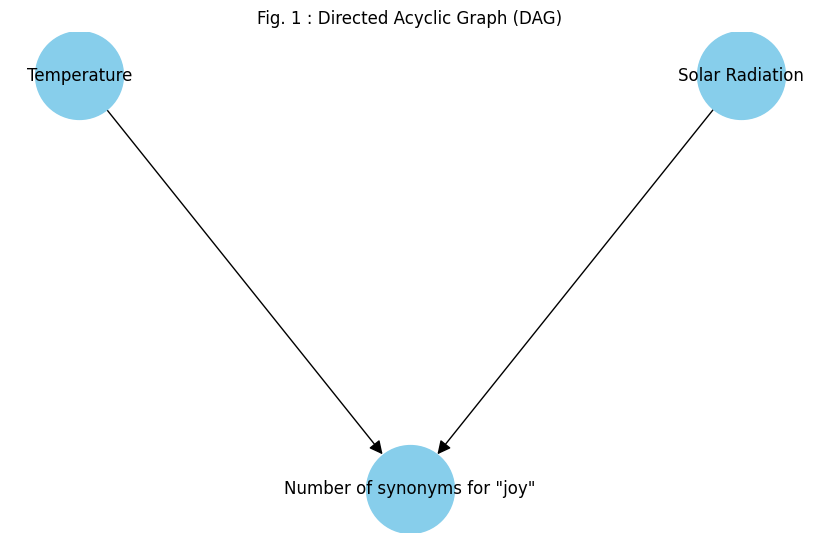

In [2]:
# Create a directed acyclic graph (DAG)
G = nx.DiGraph()  # initializes an empty directed graph

# Add nodes (entities in the graph)
nodes = ['Temperature', 'Solar Radiation', 'Number of synonyms for "joy"']
G.add_nodes_from(nodes)  # adds nodes to the graph

# Add edges (directed connections between nodes)
edges = [('Temperature', 'Number of synonyms for "joy"'), 
         ('Solar Radiation', 'Number of synonyms for "joy"')]  # defines relationships
G.add_edges_from(edges)  # adds edges to the graph

# Define fixed positions for the nodes
pos = {
    'Temperature': (0, 1),  # Position of 'Temperature' node
    'Solar Radiation': (1, 1),  # Position of 'Solar Radiation' node
    'Number of synonyms for "joy"': (0.5, 0)  # Position of 'Number of synonyms for "joy"' node
}
# Set the figure size (larger plot)
plt.figure(figsize=(8, 5))  # width 10 inches, height 8 inches

# Draw the graph with fixed positions
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, arrows=True, arrowsize=20)  
# visualizes the graph with labels and specific styles

# Title and show the plot
plt.title('Fig. 1 : Directed Acyclic Graph (DAG)')  # adds a title to the plot
plt.show()  # displays the graph

## IV. Data

In [3]:
# Read the CSV file into a pandas DataFrame
lexibank = pd.read_csv('lexibank_clipped.csv') # loads the dataset from the specified CSV file

lexibank # Display the content of the DataFrame

,Unnamed: 0,Language_ID,Form,Latitude,Longitude,Glottocode,Concepticon_Gloss,Family
0,0,aaleykusunda-KusundaK,ɐ̃ː.ʤi,28.000000,82.260000,kusu1250,ABOVE,NaN
1,1,abrahammonpa-MonpaKalaktang,thuŋga,27.104162,92.113017,kala1376,ABOVE,Sino-Tibetan
2,2,abrahammonpa-MonpaDirang,thuŋga,27.349590,92.279140,tsha1245,ABOVE,Sino-Tibetan
3,3,abrahammonpa-MonpaChangprong,jur,27.578928,91.876393,dakp1242,ABOVE,Sino-Tibetan
4,4,abrahammonpa-SartangDarbuB,khuŋlo,27.329171,92.358727,sart1249,ABOVE,Sino-Tibetan
...,...,...,...,...,...,...,...,...
709633,709633,yangyi-Pholaypg,lɑ̠²³pʰɔ³³,23.456381,102.286862,phol1237,GROOM,Sino-Tibetan
709634,709634,yangyi-Phuzaypz,sa³³ɛ¹³ɕa⁵⁵,23.253698,103.332621,phuz1235,GROOM,Sino-Tibetan
709635,709635,yangyi-SouthernMujiymc,mi²¹ɬji⁵⁵a²¹pa²¹,22.895906,103.222074,sout2722,GROOM,Sino-Tibetan
709636,709636,yangyi-HlephoPhowayhl,za²¹sɿ³³ma³³,23.333902,103.721759,hlep1236,GROOM,Sino-Tibetan


In [4]:
terms_for_joy = ["JOY", "HAPPINESS"] # creates a list containing the words "JOY" and "HAPPINESS"

In [ ]:
subset = lexibank.query(f'Concepticon_Gloss in {terms_for_joy}') # Filter the lexibank DataFrame to select rows where 'Concepticon_Gloss' matches terms related to joy and happiness

subset # Display the filtered subset

,Unnamed: 0,Language_ID,Form,Latitude,Longitude,Glottocode,Concepticon_Gloss,Family
660545,660545,northeuralex-kaz,quɑnəʃ,49.80,73.15,kaza1248,JOY,Turkic
660546,660546,northeuralex-kaz,sʊjənəʃ,49.80,73.15,kaza1248,JOY,Turkic
660547,660547,northeuralex-kaz,ʃɑtdumɑn,49.80,73.15,kaza1248,JOY,Turkic
660548,660548,northeuralex-kaz,quɑnəʃtələq,49.80,73.15,kaza1248,JOY,Turkic
660549,660549,northeuralex-kan,n̪əlɪʋu,13.59,76.12,nucl1305,JOY,Dravidian
...,...,...,...,...,...,...,...,...
660915,660915,northeuralex-lez,baχt,41.52,47.90,lezg1247,HAPPINESS,Nakh-Daghestanian
660916,660916,northeuralex-dar,iʁbar,42.43,47.44,darg1241,HAPPINESS,Nakh-Daghestanian
660917,660917,northeuralex-che,ɪrs,43.50,45.50,chec1245,HAPPINESS,Nakh-Daghestanian
660918,660918,northeuralex-arb,saʕaːda,27.96,43.85,stan1318,HAPPINESS,Afro-Asiatic


In [6]:
subset.query('Glottocode == "stan1290"')  # filters rows where the Glottocode column matches "stan1290", i.e. for French

,Unnamed: 0,Language_ID,Form,Latitude,Longitude,Glottocode,Concepticon_Gloss,Family
660561,660561,northeuralex-fra,ʒwa,48.0,2.0,stan1290,JOY,Indo-European
660562,660562,northeuralex-fra,plɛˈziːʁ,48.0,2.0,stan1290,JOY,Indo-European
660801,660801,northeuralex-fra,bɔˈnœːʁ,48.0,2.0,stan1290,HAPPINESS,Indo-European


In French, there are three synonyms for joy: "joie", "plaisir" and "bonheur". It is consistent.

In [7]:
lang_colex = []  # initializes an empty list to store the results

# Loop through each unique Glottocode in the subset DataFrame
for glottocode in subset.Glottocode.unique():  
    # Filter the subset DataFrame to select rows for the current Glottocode
    data_lg = subset.query(f'Glottocode == "{glottocode}"')  

    # Check if there is more than one unique Concepticon_Gloss for the current Glottocode
    if data_lg.Concepticon_Gloss.nunique() >= 1:  
        # Append the Glottocode and the count of unique 'Form' values to the list
        lang_colex.append([glottocode, len(data_lg.Form.unique())])  

lang_colex # Display the resulting list of language colexification data

[['kaza1248', 6],
 ['nucl1305', 2],
 ['mala1464', 3],
 ['tami1289', 2],
 ['telu1262', 1],
 ['stan1288', 3],
 ['czec1258', 2],
 ['stan1295', 2],
 ['bret1244', 2],
 ['stan1289', 3],
 ['russ1263', 2],
 ['stan1290', 3],
 ['poli1260', 2],
 ['dani1285', 2],
 ['nucl1235', 2],
 ['ital1282', 3],
 ['port1283', 3],
 ['mode1248', 2],
 ['swed1254', 3],
 ['adyg1241', 2],
 ['basq1248', 3],
 ['buru1296', 3],
 ['esto1258', 2],
 ['nucl1302', 2],
 ['kore1280', 2],
 ['halh1238', 3],
 ['nucl1301', 3],
 ['lati1261', 3],
 ['finn1318', 3],
 ['kare1335', 2],
 ['livv1243', 3],
 ['veps1250', 3],
 ['livv1244', 2],
 ['sout2674', 3],
 ['lule1254', 2],
 ['nort2671', 2],
 ['inar1241', 3],
 ['skol1241', 5],
 ['west2392', 2],
 ['east2328', 3],
 ['moks1248', 2],
 ['erzy1239', 2],
 ['udmu1245', 2],
 ['komi1269', 3],
 ['komi1268', 2],
 ['hung1274', 2],
 ['khan1273', 3],
 ['mans1258', 3],
 ['selk1253', 2],
 ['nene1249', 2],
 ['fore1265', 2],
 ['ngan1291', 2],
 ['beng1280', 2],
 ['hind1269', 3],
 ['nort2646', 2],
 ['west236

In [8]:
df = pd.DataFrame(lang_colex) # creates a DataFrame from the lang_colex list

df.columns = ['glottocode', 'Number_of_terms'] # renames the columns to 'glottocode' and 'Number_of_terms'

df # displays the resulting DataFrame

,glottocode,Number_of_terms
0,kaza1248,6
1,nucl1305,2
2,mala1464,3
3,tami1289,2
4,telu1262,1
...,...,...
102,sunw1242,1
103,khal1275,1
104,newa1246,1
105,gily1242,1


c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


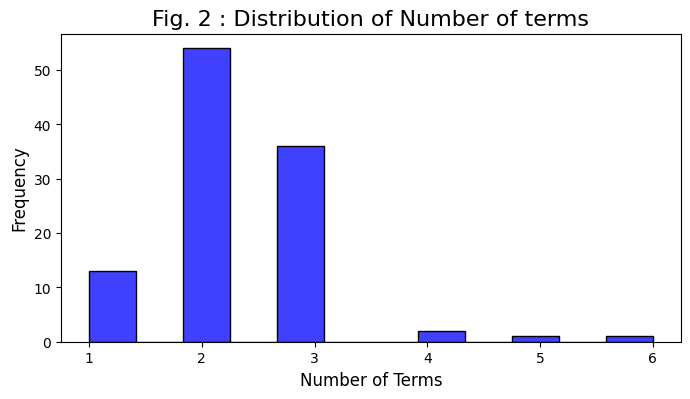

In [9]:
# Create a single plot figure
plt.figure(figsize=(8, 4))  # initializes a figure with a size of 8x4 inches

# Add the title
plt.title("Fig.II Distribution of Key Variables", fontsize=20)  # adds a title to the plot

# Plot: Number of terms
sns.histplot(df["Number_of_terms"], color="blue")  # creates a histogram for the 'Number_of_terms' column in blue
plt.title("Fig. 2 : Distribution of Number of terms", fontsize=16)  # sets the title for the histogram
plt.xlabel("Number of Terms", fontsize=12)  # sets the label for the x-axis
plt.ylabel("Frequency", fontsize=12)  # sets the label for the y-axis

# Show the plot
plt.show()  # displays the plot on the screen

In [10]:
glottolog = pd.read_csv('glottolog.csv')  # loads the dataset from the specified CSV file

glottolog # Display the content of the DataFrame

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
...,...,...,...,...,...,...,...
21952,zuwa1238,Zuwadza,NaN,dialect,Papunesia,NaN,NaN
21953,zwal1238,Zwall,NaN,dialect,Africa,NaN,NaN
21954,zyph1238,Zyphe,zyp,language,Eurasia,22.52400,93.2640
21955,zyud1238,Zyuzdin,NaN,dialect,Eurasia,NaN,NaN


In [11]:
# Merge the 'df' DataFrame with the 'glottolog' DataFrame on the 'glottocode' column
df = pd.merge(df, glottolog, on='glottocode', how='left')

df # Display the resulting merged DataFrame

,glottocode,Number_of_terms,name,isocodes,level,macroarea,latitude,longitude
0,kaza1248,6,Kazakh,kaz,language,Eurasia,51.170000,71.454000
1,nucl1305,2,Kannada,kan,language,Eurasia,13.587800,76.119800
2,mala1464,3,Malayalam,mal,language,Eurasia,9.592080,76.765100
3,tami1289,2,Tamil,tam,language,Eurasia,10.520219,78.825989
4,telu1262,1,Telugu,tel,language,Eurasia,16.452900,78.702400
...,...,...,...,...,...,...,...,...
102,sunw1242,1,Sunwar,suz,language,Eurasia,27.520100,86.247600
103,khal1275,1,Khaling,klr,language,Eurasia,27.391200,87.505300
104,newa1246,1,Kathmandu Valley Newari,new,language,Eurasia,27.670000,85.326000
105,gily1242,1,Amur Nivkh,niv,language,Eurasia,52.590000,140.681000


In [ ]:
# Load the TIFF files (the files should be named with months for easier import)
tif_files = [f"wc2.1_5m_tavg/wc2.1_5m_tavg_{month:02d}.tif" for month in range(1, 13)]  # creates a list of file names for each month

# Function to extract temperature from coordinates
def extract_temperature(lat, lon, tif_files):
    temperatures = []  # initializes an empty list to store temperatures
    for tif in tif_files:  # iterates through each TIFF file (representing monthly data)
        # Read the TIFF file
        with rasterio.open(tif) as dataset:  # opens the TIFF file
            # Convert latitude and longitude to pixel indices
            row, col = dataset.index(lon, lat)  # converts coordinates to row and column indices
            # Extract the value at that pixel
            try:
                temp = dataset.read(1)[row, col]  # reads the pixel value
                if temp != dataset.nodata:  # check if it's not a missing value
                    temperatures.append(temp)  # add the temperature to the list
                else:
                    temperatures.append(np.nan)  # add NaN if the value is missing
            except IndexError:
                temperatures.append(np.nan)  # add NaN if the coordinate is out of bounds
    return temperatures  # returns the list of temperatures for the months

# Add the temperatures for each point
df['monthly_temperatures'] = df.apply(
    lambda row: extract_temperature(row['latitude'], row['longitude'], tif_files),  # apply the function to each row
    axis=1  # applies the function along the rows
)

# Calculate the annual average for each point
df['average_temperature'] = df['monthly_temperatures'].apply(
    lambda temps: np.nanmean(temps)  # calculates the mean while ignoring NaN values
)

# Result
df[['latitude', 'longitude', 'average_temperature']]  # displays the relevant columns of the DataFrame

c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\transform.py:410: RuntimeWarning: invalid value encountered in cast
  new_rows = np.floor(new_rows).astype(dtype="int32")
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\transform.py:411: RuntimeWarning: invalid value encountered in cast
  new_cols = np.floor(new_cols).astype(dtype="int32")


In [56]:
# Load the TIFF files (the files should be named with months for easier import)
tif_files = [f"wc2.1_5m_srad/wc2.1_5m_srad_{month:02d}.tif" for month in range(1, 13)]  # creates a list of file names for each month (solar radiation)

# Function to extract solar radiation from coordinates
def extract_temperature(lat, lon, tif_files):
    solar_radiations = []  # initializes an empty list to store solar radiation values
    for tif in tif_files:  # iterates through each TIFF file (representing monthly data)
        # Read the TIFF file
        with rasterio.open(tif) as dataset:  # opens the TIFF file
            # Convert latitude and longitude to pixel indices
            row, col = dataset.index(lon, lat)  # converts coordinates to row and column indices
            # Extract the value at that pixel
            try:
                temp = dataset.read(1)[row, col]  # reads the pixel value
                if temp != dataset.nodata:  # check if it's not a missing value
                    solar_radiations.append(temp)  # add the solar radiation to the list
                else:
                    solar_radiations.append(np.nan)  # add NaN if the value is missing
            except IndexError:
                solar_radiations.append(np.nan)  # add NaN if the coordinate is out of bounds
    return solar_radiations  # returns the list of solar radiation values for the months

# Add the solar radiation for each point
df['monthly_solar_radiations'] = df.apply(
    lambda row: extract_temperature(row['latitude'], row['longitude'], tif_files),  # applies the function to each row
    axis=1  # applies the function along the rows
)

# Calculate the annual average for each point
df['average_solar_radiation'] = df['monthly_solar_radiations'].apply(
    lambda temps: np.nanmean(temps)  # calculates the mean while ignoring NaN values
)

# Result
df[['latitude', 'longitude', 'average_solar_radiation']]  # displays the relevant columns of the DataFrame

c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\transform.py:410: RuntimeWarning: invalid value encountered in cast
  new_rows = np.floor(new_rows).astype(dtype="int32")
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\transform.py:411: RuntimeWarning: invalid value encountered in cast
  new_cols = np.floor(new_cols).astype(dtype="int32")
C:\Users\lvber\AppData\Local\Temp\ipykernel_11948\840976799.py:31: RuntimeWarning: Mean of empty slice
  lambda temps: np.nanmean(temps)  # calculates the mean while ignoring NaN values


,latitude,longitude,average_solar_radiation
0,51.170000,71.454000,12173.750000
1,13.587800,76.119800,19849.750000
2,9.592080,76.765100,19025.333333
3,10.520219,78.825989,20172.083333
4,16.452900,78.702400,19668.500000
...,...,...,...
102,27.520100,86.247600,16555.500000
103,27.391200,87.505300,16578.833333
104,27.670000,85.326000,17109.750000
105,52.590000,140.681000,11929.750000


In [60]:
df.query('glottocode == "stan1290"') # filters again rows where the Glottocode column matches "stan1290", i.e. for French

,glottocode,Number_of_terms,name,isocodes,level,macroarea,latitude,longitude,monthly_temperatures,average_temperature,monthly_solar_radiations,average_solar_radiation
11,stan1290,3,French,fra,language,Eurasia,48.0,2.0,"[3.523, 4.158, 7.141, 9.501, 13.626, 16.584, 1...",10.907416,"[3412, 6084, 10722, 15479, 18716, 20097, 20186...",11647.5


In [67]:
df_plot = df.copy()  # creates a new DataFrame 'df_plot' as a copy of 'df', for the plot and not for the test

# Replace specific values in the 'Number_of_terms' column with '4 or more'
df_plot['Number_of_terms'] = df_plot['Number_of_terms'].replace({
    3:  '3 or more',
    4: '3 or more',  # replaces the value 4 with '4 or more'
    5: '3 or more',  # replaces the value 5 with '4 or more'
    6: '3 or more'   # replaces the value 6 with '4 or more'
})

## V. Analysis

c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

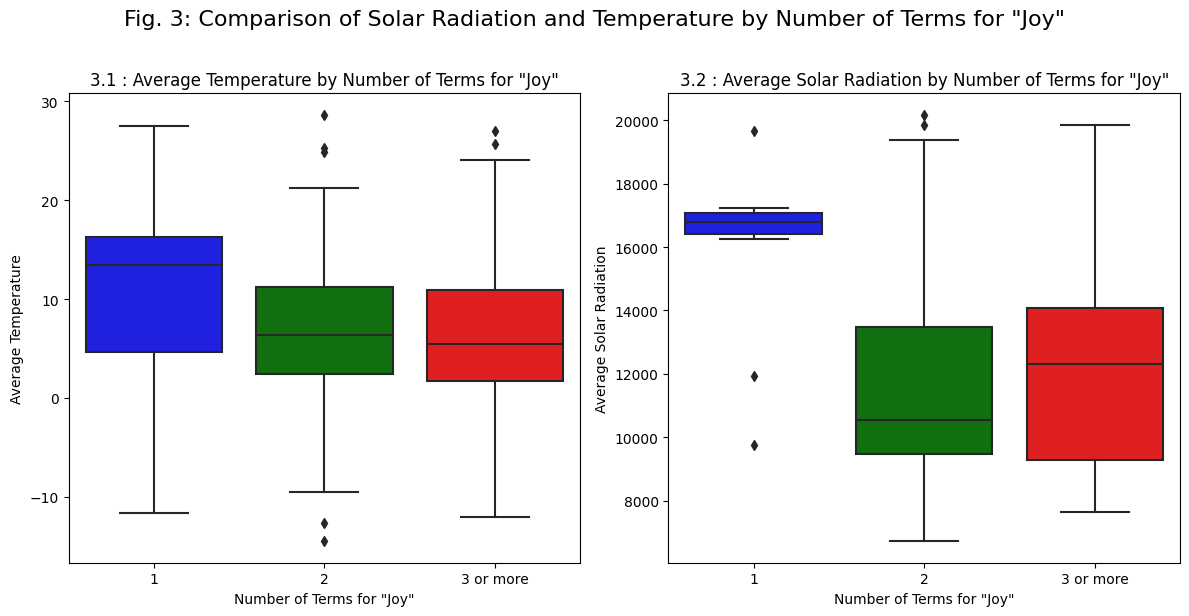

In [93]:
#  Define a consistent color palette for the categories
palette = {1: "blue", 2: "green", "3 or more": "red"}  # Colors for each category

# Define the figure size and create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Creates a figure with 1 row and 2 columns of subplots

# First plot: Boxplot for average_temperature
sns.boxplot(
    x='Number_of_terms',  # x-axis: Number of terms for "joy"
    y='average_temperature',  # y-axis: Average temperature
    data=df_plot,  # Data source: df_plot
    order=[1, 2, '3 or more'],  # Specifies the order of categories on the x-axis
    ax=axes[0],  # Plots on the first subplot (left)
    palette=palette  # Use the defined color palette
)
axes[0].set_title('3.1 : Average Temperature by Number of Terms for "Joy"', fontsize=12)  # Title for the first subplot
axes[0].set_xlabel('Number of Terms for "Joy"', fontsize=10)  # x-axis label
axes[0].set_ylabel('Average Temperature', fontsize=10)  # y-axis label

# Second plot: Boxplot for average_solar_radiation
sns.boxplot(
    x='Number_of_terms',  # x-axis: Number of terms for "joy"
    y='average_solar_radiation',  # y-axis: Average solar radiation
    data=df_plot,  # Data source: df_plot
    order=[1, 2, '3 or more'],  # Specifies the order of categories on the x-axis
    ax=axes[1],  # Plots on the second subplot (right)
    palette=palette  # Use the defined color palette
)
axes[1].set_title('3.2 : Average Solar Radiation by Number of Terms for "Joy"', fontsize=12)  # Title for the second subplot
axes[1].set_xlabel('Number of Terms for "Joy"', fontsize=10)  # x-axis label
axes[1].set_ylabel('Average Solar Radiation', fontsize=10)  # y-axis label

# Add a global title for all the plots
plt.suptitle(
    'Fig. 3: Comparison of Solar Radiation and Temperature by Number of Terms for "Joy"', 
    fontsize=16, 
    y=1.02
)  # Global title

# Adjust the spacing between the plots to avoid overlap
plt.tight_layout()  # Automatically adjusts the layout to prevent overlap
plt.show()  # Displays the plots

In [69]:
# Build a regression model with interaction (using Ordinary Least Squares)
model = smf.ols(
    formula='Q("Number_of_terms") ~ Q("average_solar_radiation") + Q("average_temperature")',  # regression formula
    data=df  # data source: df
).fit()  # fits the model to the data

print(model.summary()) # Display the model summary (results of the regression analysis)

                             OLS Regression Results                             
Dep. Variable:     Q("Number_of_terms")   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.040
Method:                   Least Squares   F-statistic:                     3.120
Date:                  Fri, 17 Jan 2025   Prob (F-statistic):             0.0484
Time:                          14:19:33   Log-Likelihood:                -123.98
No. Observations:                   104   AIC:                             254.0
Df Residuals:                       101   BIC:                             261.9
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lvber\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lvber\AppData\Local\Temp\ipykernel_11948\2865407900.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_pred, y=y_real, alpha=0.7, label='Data', palette = palette)  # plots the predicted values on the x-axis and real values on the y-axis


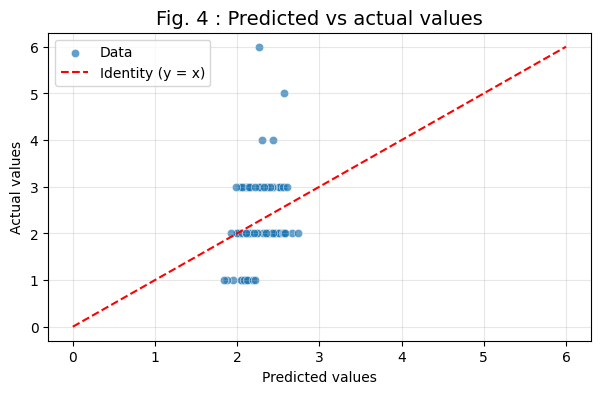

In [84]:
y_real = df['Number_of_terms']  # actual values of the dependent variable
y_pred = model.predict(df)  # predicted values from the regression model

# Create a figure for plotting
plt.figure(figsize=(7, 4))  # sets the figure size to 8x6 inches
sns.scatterplot(x=y_pred, y=y_real, alpha=0.7, label='Data')  # plots the predicted values on the x-axis and real values on the y-axis

# Add a y = x line to represent the perfect prediction (where predicted = actual)
max_val = max(max(y_real), max(y_pred))  # finds the upper limit for the axis (the maximum value between actual and predicted)
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Identity (y = x)')  # adds the identity line (perfect prediction)

r_squared = model.rsquared  # gets the R² value from the model

plt.title('Fig. 4 : Predicted vs actual values', fontsize=14)  # title of the plot
plt.xlabel('Predicted values')  # x-axis label
plt.ylabel('Actual values')  # y-axis label
plt.legend()  # adds the legend to the plot
plt.grid(alpha=0.3)  # adds a grid with 30% transparency

plt.show()  # displays the plot

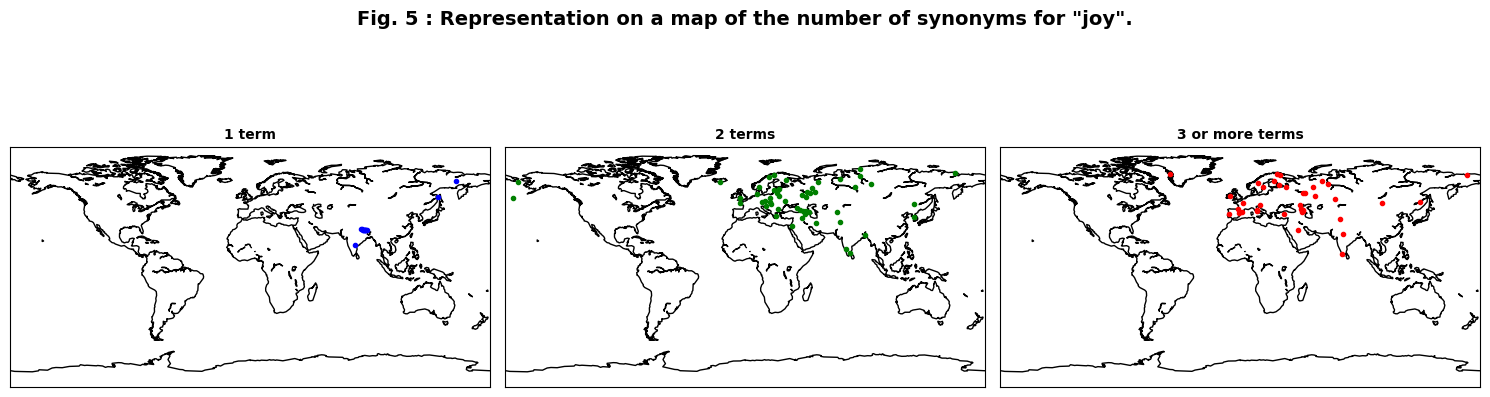

In [91]:
# Prepare data for points where 'Number_of_terms == 1'
x_same = df.query('Number_of_terms == 1')['longitude']  # Extract longitude for entries with exactly 1 term
y_same = df.query('Number_of_terms == 1')['latitude']   # Extract latitude for entries with exactly 1 term

# Prepare data for points where 'Number_of_terms == 2'
x_different = df.query('Number_of_terms == 2')['longitude']  # Extract longitude for entries with exactly 2 terms
y_different = df.query('Number_of_terms == 2')['latitude']   # Extract latitude for entries with exactly 2 terms

# Prepare data for points where 'Number_of_terms >= 3'
x_three_or_more = df.query('Number_of_terms >= 3')['longitude']  # Extract longitude for entries with 3 or more terms
y_three_or_more = df.query('Number_of_terms >= 3')['latitude']   # Extract latitude for entries with 3 or more terms

# Create subplots: one row, three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Set up a figure with 3 subplots in a row, size 15x5 inches

# Subplot for "same term" (1 term)
ax = axes[0]  # Access the first subplot
m1 = Basemap(projection='cyl', resolution='c', ax=ax)  # Create a map with cylindrical projection
m1.drawcoastlines(color='black')  # Draw coastlines in black
m1.fillcontinents(color='white', lake_color='white')  # Fill land areas with white color
m1.plot(x_same, y_same, 'bo', markersize=3, alpha=1)  # Plot data points as small red circles
ax.set_title('1 term', fontsize=10, weight='bold')  # Add a title to the first subplot

# Subplot for "different terms" (2 terms)
ax = axes[1]  # Access the second subplot
m2 = Basemap(projection='cyl', resolution='c', ax=ax)  # Create a map with cylindrical projection
m2.drawcoastlines(color='black')  # Draw coastlines in black
m2.fillcontinents(color='white', lake_color='white')  # Fill land areas with white color
m2.plot(x_different, y_different, 'go', markersize=3, alpha=1)  # Plot data points as small red circles
ax.set_title('2 terms', fontsize=10, weight='bold')  # Add a title to the second subplot

# Subplot for "3 or more terms"
ax = axes[2]  # Access the third subplot
m3 = Basemap(projection='cyl', resolution='c', ax=ax)  # Create a map with cylindrical projection
m3.drawcoastlines(color='black')  # Draw coastlines in black
m3.fillcontinents(color='white', lake_color='white')  # Fill land areas with white color
m3.plot(x_three_or_more, y_three_or_more, 'ro', markersize=3, alpha=1)  # Plot data points as small red circles
ax.set_title('3 or more terms', fontsize=10, weight='bold')  # Add a title to the third subplot

# Add a general title to the figure
fig.suptitle('Fig. 5 : Representation on a map of the number of synonyms for "joy".', fontsize=14, weight='bold')

# Adjust layout to prevent overlapping and show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the final figure

## VI. Conclusion

The results of the regression analysis provide intriguing insights into the relationship between climatic factors and the lexical richness of languages in describing joy. While the overall explanatory power of the model (R² = 0.058) is modest (see figure 4), indicating limited predictability of the dependent variable (number of terms for joy) from the climatic variables, some patterns are noteworthy.  

The analysis (see figure 3.2) shows that **average solar radiation has a statistically significant negative relationship** with the number of joy-related terms in a language (coef = -8.28e-05, p-value = 0.025), suggesting that higher solar radiation might be associated with fewer terms for joy. This result challenges the intuitive assumption that sunnier environments promote a more lexically rich expression of happiness.  

In contrast (see figure 3.1), **average temperature does not appear to have a significant impact** on the number of joy-related terms (coef = 0.0171, p-value = 0.245). This suggests that while temperature might influence emotional states and cultural expressions, its role in shaping the lexical diversity of happiness-related words is less pronounced, at least within the scope of this dataset.  

Despite these findings, the model's low R² shows that further investigation with additional variables or alternative methods might be needed to clarify these relationships.  

The spatial representation of the number of sononyms for "joy" (see figure 5) shows another dimension: proximity to bodies of water, such as seas or oceans, also seems to influence the vocabulary relating to joy. This observation, based on the geographical mapping of the data points, suggests that linguistic expressions of happiness may be shaped by complex interactions between climate, geography and human cultural practices related to proximity to water.

Overall, while the data provide evidence of a link between environmental factors and linguistic expressions of happiness, the relationships are more nuanced than the initial hypothesis, highlighting the complex interaction between climate, geography, culture and language.